In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import glob

In [36]:
#Concatenating streams datasets together

all_data = pd.DataFrame()
for file in glob.glob("Games CSV/*.csv"):
    df = pd.read_csv(file)
    all_data = all_data.append(df,ignore_index=True)
    
all_data.head()

,Timestamp,Game Rank,Game,Giantbomb ID,Total Viewers,Total Channels
0,2018-10-04 21:27,1,Fortnite,37030,201354,15494
1,2018-10-04 21:27,2,League of Legends,24024,88663,2449
2,2018-10-04 21:27,3,Sports & Fitness,0,81293,19
3,2018-10-04 21:27,4,Just Chatting,0,57709,539
4,2018-10-04 21:27,5,Assassin's Creed Odyssey,68771,45258,346


In [37]:
#Compiling total viewers and total channels over timestamps
bygame_time_df = all_data.groupby(['Game','Timestamp'])
timestamp_viewers = bygame_time_df['Total Viewers'].sum()
timestamp_channels = bygame_time_df['Total Channels'].sum()
timestamp_values_df = pd.DataFrame(timestamp_viewers)
timestamp_values_df['Total Channels'] = timestamp_channels
timestamp_values_df = timestamp_values_df.reset_index()
timestamp_values_df.head()

,Game,Timestamp,Total Viewers,Total Channels
0,ARK,2018-10-06 21:19,7342,202
1,ASMR,2018-10-07 02:19,7059,40
2,ASMR,2018-10-07 03:19,4731,40
3,ASMR,2018-10-07 23:19,6042,43
4,Always On,2018-10-04 21:27,12797,19


In [38]:
#Receiving list of 15 games with most amount of timestamps
gamecount = timestamp_values_df.groupby('Game').count()
gamecount_df = pd.DataFrame(gamecount)
gamecount_df = gamecount_df.reset_index()
gamecount_df = gamecount_df.sort_values(by='Timestamp', ascending = False)
gamelist_df = gamecount_df.iloc[0:15,0:2]
gamelist = list(gamelist_df['Game'])

In [39]:
#Restrict timestamp df to games with most complete info for plot
plot_df = timestamp_values_df[timestamp_values_df['Game'].isin(gamelist)]


In [40]:
#Formatting
plot_df['Datetime'] = pd.to_datetime(plot_df['Timestamp'], format="%Y.%m.%d %H:%M")
#Total Viewers df
plot_df_tv=plot_df[['Game','Datetime','Total Viewers']]
#Total Channels df
plot_df_tc=plot_df[['Game','Datetime','Total Channels']]

plot_df.set_index('Datetime', inplace = True)
plot_df_tv.set_index('Datetime', inplace = True)
plot_df_tc.set_index('Datetime', inplace = True)
ticklabels = plot_df.index.strftime('%Y-%m-%d %H:%M')



#Simple Plot
#plot_df.groupby('Game')['Total Viewers'].plot(legend = True)



C:\Users\matth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


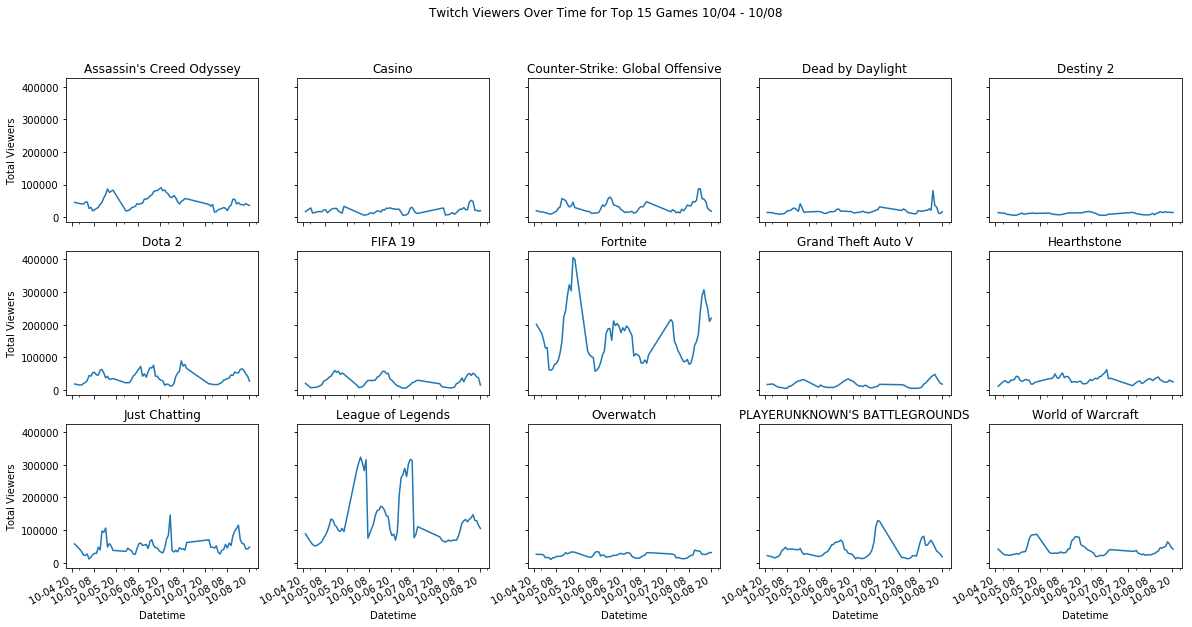

<Figure size 432x288 with 0 Axes>

In [55]:
#Total Viewers Subplots
grouped = plot_df_tv.groupby('Game')
ncols = 5
nrows = int(np.ceil(grouped.ngroups/ncols))

fig,axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20,10), sharex=True, sharey=True)

for (key,ax) in zip(grouped.groups.keys(), axes.flatten()):
    grouped.get_group(key).plot(ax=ax)
    ax.set_title(key)
    ax.set_ylabel('Total Viewers')
    ax.set_xlabel('Datetime')
    ax.legend_.remove()


plt.suptitle('Twitch Viewers Over Time for Top 15 Games 10/04 - 10/08')
plt.savefig('totalviews.png', bbox_inches = 'tight', dpi = 100)
plt.show()
plt.tight_layout()


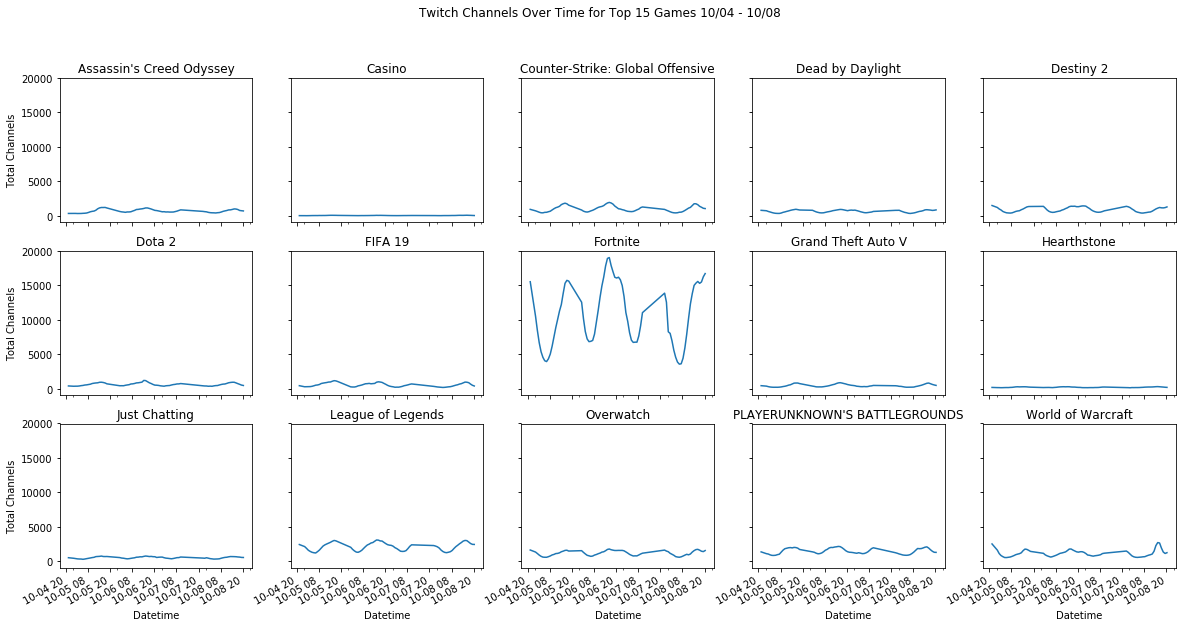

<Figure size 432x288 with 0 Axes>

In [56]:
#Total Channels Subplots

grouped_tc = plot_df_tc.groupby('Game')
ncols = 5
nrows = int(np.ceil(grouped_tc.ngroups/ncols))

fig,axes = plt.subplots(nrows = nrows, ncols = ncols, figsize = (20,10), sharex=True, sharey=True)

for (key,ax) in zip(grouped_tc.groups.keys(), axes.flatten()):
    grouped_tc.get_group(key).plot(ax=ax)
    ax.set_title(key)
    ax.set_ylabel('Total Channels')
    ax.set_xlabel('Datetime')
    ax.legend_.remove()


plt.suptitle('Twitch Channels Over Time for Top 15 Games 10/04 - 10/08')
plt.savefig('totalchannels.png', bbox_inches = 'tight', dpi = 100)
plt.show()
plt.tight_layout()
